In [1]:
"I (We) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work."



'I (We) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work.'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

In [3]:
df = pd.read_csv("income_dataset.csv")

In [4]:
df.shape

(32561, 15)

In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.isnull().sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df_categorical = df.select_dtypes(include=['object'])

df_categorical.nunique()

workclass          9
education         16
marital.status     7
occupation        15
relationship       6
race               5
sex                2
native.country    42
income             2
dtype: int64

In [11]:
# Lets explore the categorical/string columns in more detail
# Note that there are some '?' values which must be missing values

for col in df_categorical:
    print(col, ": ", df[col].unique())

workclass :  ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
education :  ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
marital.status :  ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation :  ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship :  ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
race :  ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
sex :  ['Female' 'Male']
native.country :  ['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippi

In [12]:
# Replacing ? with NaN

df.replace("?", np.nan, inplace = True)
df.head(5)  

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [13]:
# removing missing values
df.dropna(inplace=True)

In [14]:
# checking if we need both education and education_num columns

for edu in df['education'].unique():
    print(edu,":", df[df['education'] == edu]["education.num"].nunique())
    
# Note that 'education.num' is unique for each value of 'education'. 
# It also appears to be ordinal which makes sense. 
# Thus, we can remove 'education' column

df = df.drop(columns = ['education'])

HS-grad : 1
7th-8th : 1
Some-college : 1
10th : 1
Doctorate : 1
Prof-school : 1
Bachelors : 1
Masters : 1
11th : 1
Assoc-voc : 1
1st-4th : 1
5th-6th : 1
Assoc-acdm : 1
12th : 1
9th : 1
Preschool : 1


In [15]:
df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [16]:
## EDA plots

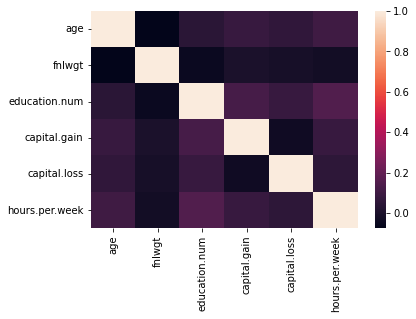

In [17]:
sns.heatmap(df.corr())
plt.show()

# negligible correlation between variables

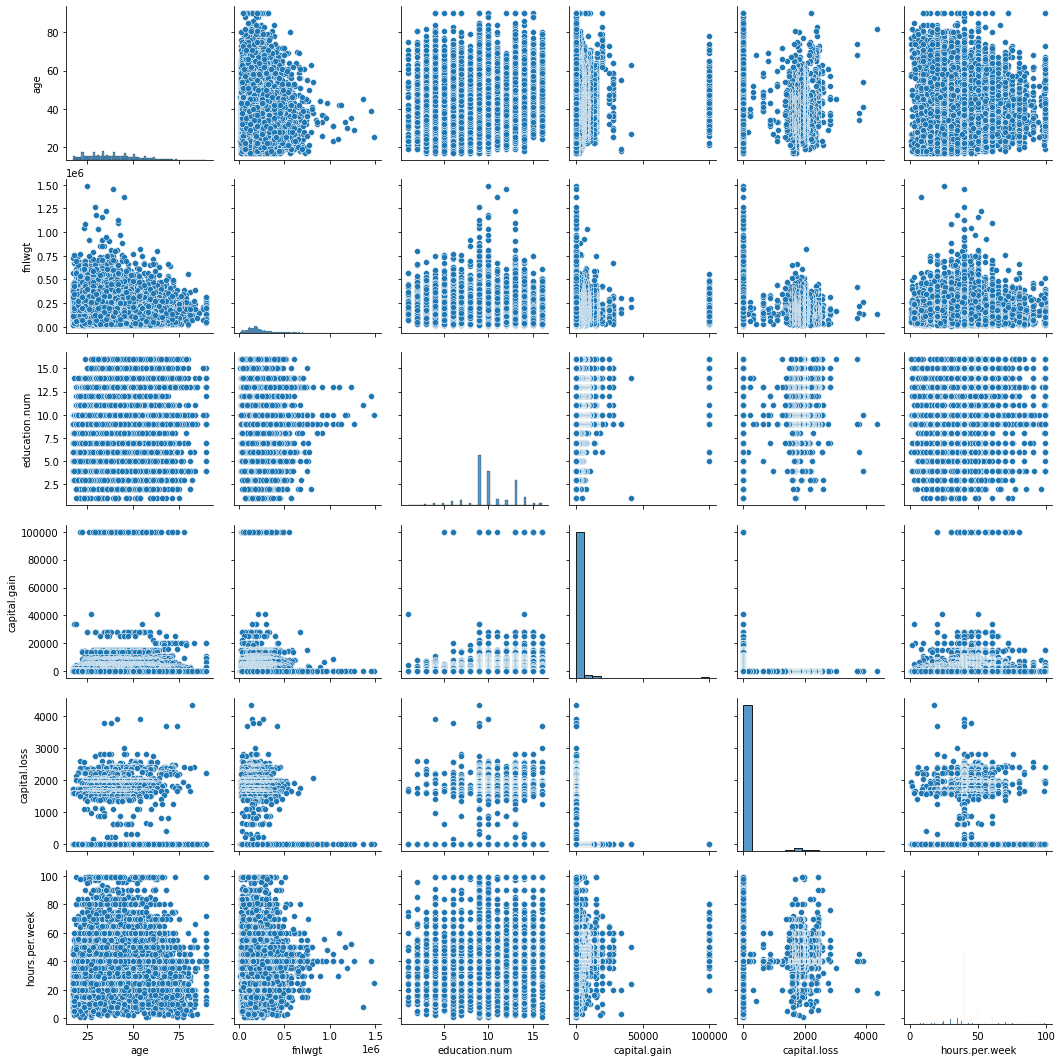

In [18]:
sns.pairplot(df)
plt.show()

In [20]:
# One-hot encoding the categorical variables to use in NN model

df = pd.get_dummies(df, drop_first=True)
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_>50K
1,82,132870,9,0,4356,18,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,54,140359,4,0,3900,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,41,264663,10,0,3900,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5,34,216864,9,0,3770,45,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,38,150601,6,0,3770,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 82 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        30162 non-null  int64
 1   fnlwgt                                     30162 non-null  int64
 2   education.num                              30162 non-null  int64
 3   capital.gain                               30162 non-null  int64
 4   capital.loss                               30162 non-null  int64
 5   hours.per.week                             30162 non-null  int64
 6   workclass_Local-gov                        30162 non-null  uint8
 7   workclass_Private                          30162 non-null  uint8
 8   workclass_Self-emp-inc                     30162 non-null  uint8
 9   workclass_Self-emp-not-inc                 30162 non-null  uint8
 10  workclass_State-gov                        301

In [22]:
# min-max scaling of the continuous features

# Min - Max Scaling of the remaining features. 

df.age = (df.age - df.age.min())/(df.age.max() - df.age.min())
df.fnlwgt = (df.fnlwgt - df.fnlwgt.min())/(df.fnlwgt.max() - df.fnlwgt.min())
df["capital.loss"] = (df["capital.loss"] - df["capital.loss"].min())/(df["capital.loss"].max() - df["capital.loss"].min())
df["capital.gain"] = (df["capital.gain"] - df["capital.gain"].min())/(df["capital.gain"].max() - df["capital.gain"].min())
df["education.num"] = (df["education.num"] - df["education.num"].min())/(df["education.num"].max() - df["education.num"].min())
df["hours.per.week"] = (df["hours.per.week"] - df["hours.per.week"].min())/(df["hours.per.week"].max() - df["hours.per.week"].min())


In [29]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df["income_>50K"]
# Split Train and Test Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)  

In [32]:
#Input features to the first hidden layer of 128 neurons, followed by two additional hidden layers of 256 neurons.
#There’s a 1-neuron output layer at the end. Hidden layers use ReLU as the activation function, and the output layer uses Sigmoid

import tensorflow as tf

tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
632/632 [==============================] - 1s 1ms/step - loss: 0.4132 - accuracy: 0.8114 - precision: 0.6591 - recall: 0.5187
Epoch 2/100
632/632 [==============================] - 1s 1ms/step - loss: 0.3634 - accuracy: 0.8302 - precision: 0.7113 - recall: 0.5472
Epoch 3/100
632/632 [==============================] - 1s 1ms/step - loss: 0.3577 - accuracy: 0.8396 - precision: 0.7255 - recall: 0.5828
Epoch 4/100
632/632 [==============================] - 1s 1ms/step - loss: 0.3443 - accuracy: 0.8386 - precision: 0.7192 - recall: 0.5879
Epoch 5/100
632/632 [==============================] - 1s 1ms/step - loss: 0.3602 - accuracy: 0.8382 - precision: 0.7194 - recall: 0.5854
Epoch 6/100
632/632 [==============================] - 1s 1ms/step - loss: 0.3366 - accuracy: 0.8443 - precision: 0.7310 - recall: 0.6029
Epoch 7/100
632/632 [==============================] - 1s 1ms/step - loss: 0.3362 - accuracy: 0.8417 - precision: 0.7284 - recall: 0.5915
Epoch 8/100
632/632 [=============

632/632 [==============================] - 1s 1ms/step - loss: 0.3304 - accuracy: 0.8427 - precision: 0.7308 - recall: 0.5932
Epoch 61/100
632/632 [==============================] - 1s 1ms/step - loss: 0.3296 - accuracy: 0.8443 - precision: 0.7351 - recall: 0.5960
Epoch 62/100
632/632 [==============================] - 1s 1ms/step - loss: 0.3345 - accuracy: 0.8443 - precision: 0.7303 - recall: 0.6044
Epoch 63/100
632/632 [==============================] - 1s 1ms/step - loss: 0.3341 - accuracy: 0.8428 - precision: 0.7282 - recall: 0.5987
Epoch 64/100
632/632 [==============================] - 1s 1ms/step - loss: 0.3323 - accuracy: 0.8432 - precision: 0.7296 - recall: 0.5987
Epoch 65/100
632/632 [==============================] - 1s 1ms/step - loss: 0.3287 - accuracy: 0.8459 - precision: 0.7368 - recall: 0.6025
Epoch 66/100
632/632 [==============================] - 1s 1ms/step - loss: 0.3274 - accuracy: 0.8449 - precision: 0.7299 - recall: 0.6086
Epoch 67/100
632/632 [==================